In [2]:
import os 
import pandas as pd
import numpy as np 


In [32]:
def filter_lst(lst):
    filter_lst = [x for x in lst if ".csv" in x]
    return filter_lst

def filter_model_names(lst, model):
    filter_lst = [x for x in lst if model in x]
    return filter_lst
    

def lst_to_df(lst, folder):
    """"Takes in list of model .csv files and
        retruns a df of the model hyperparemters, 
        max acc and min loss
        """
    df = pd.DataFrame(columns=['Model', 'Learning Rate', 'Weights','Loss Function', 'Augmented', 'F1 Score', 'Loss', 'File Name'])
    
    for file in lst:

        f1 = max(pd.read_csv(folder+file)["val_f1_m"])
        loss = min(pd.read_csv(folder+file)["val_loss"])

        full_file = file

        file.replace("10Chan", "")

        # loss fucn
        if "_binary_crossentropy" in file:
            loss_func = "binary_crossentropy"
            file = file.replace('_binary_crossentropy', '')
        else:
            loss_func = "dice_loss"
            file = file.replace('_dice_loss', '')

        # model 
        if "inceptionv3" in file:
            model = "inceptionv3"
            file = file.replace('inceptionv3', '')
        elif "resnet50" in file:
            model = "resnet50"
            file = file.replace('resnet50', '')
        else:
            model = "Unet"
            file = file.replace('base_unet', '')

        #img net 
        if "img" in file:
            weights = "ImageNet"
            file = file.replace('img', '')
        else:
            weights = "Random"

        if 'aug' in file:
            aug = "y"
        else:
            aug = "n"

        lr = file.split('_')[-1][:-4]
            

        data = [model, lr, weights, loss_func, aug, f1, loss, full_file]

        df = pd.concat([df, pd.DataFrame([data], columns=df.columns)], ignore_index=True)

    return df

In [13]:
def lst_to_df(lst, folder):
    """"Takes in list of model .csv files and
        retruns a df of the model hyperparemters, 
        max acc and min loss
        """
    df = pd.DataFrame(columns=['Model', 'F1 Score', 'Loss'])
    
    for file in lst:

        f1 = max(pd.read_csv(folder+file)["val_f1_m"])
        loss = min(pd.read_csv(folder+file)["val_loss"])
        
        model = file[:-4]

        data = [model, f1, loss]

        df = pd.concat([df, pd.DataFrame([data], columns=df.columns)], ignore_index=True)

    return df

In [41]:
folder = "/Users/frankconway/Downloads/drive-download-20250326T170804Z-001/"
files = os.listdir(folder)
ten_chan = filter_model_names(files, "10Chan")
six_chan = filter_model_names(files, "6Chan")
RGB = filter_model_names(files, "RGB")

In [39]:
#len(RGB)
#len(six_chan)
#len(ten_chan)

54

In [43]:
ten_chan_df = lst_to_df(ten_chan, folder)

ten_chan_df.sort_values(by="F1 Score", ascending=False)

/var/folders/7p/skyzq__54w10q_m2tnsc0grh0000gn/T/ipykernel_49737/939905987.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data], columns=df.columns)], ignore_index=True)


,Model,Learning Rate,Weights,Loss Function,Augmented,F1 Score,Loss,File Name
27,inceptionv3,0.001,Random,binary_crossentropy,n,0.701121,0.031957,inceptionv310Chan_0.001_binary_crossentropy.csv
46,Unet,0.001,Random,binary_crossentropy,n,0.683387,0.032396,base_unet10Chan_0.001_binary_crossentropy.csv
8,Unet,0.0001,Random,binary_crossentropy,n,0.680485,0.036658,base_unet10Chan_0.0001_binary_crossentropy.csv
5,resnet50,0.001,ImageNet,binary_crossentropy,n,0.668014,0.035477,resnet50_img10Chan_0.001_binary_crossentropy.csv
28,resnet50,0.001,Random,binary_crossentropy,n,0.656720,0.028134,resnet5010Chan_0.001_binary_crossentropy.csv
53,inceptionv3,0.001,Random,binary_crossentropy,y,0.649180,0.027715,inceptionv3_aug10Chan_0.001_binary_crossentrop...
45,inceptionv3,0.001,ImageNet,binary_crossentropy,n,0.636018,0.039622,inceptionv3_img10Chan_0.001_binary_crossentrop...
10,Unet,0.001,Random,binary_crossentropy,y,0.633211,0.028036,base_unet_aug10Chan_0.001_binary_crossentropy.csv
52,inceptionv3,0.0001,Random,binary_crossentropy,n,0.606759,0.041339,inceptionv310Chan_0.0001_binary_crossentropy.csv
31,Unet,0.0001,Random,binary_crossentropy,y,0.596466,0.031446,base_unet_aug10Chan_0.0001_binary_crossentropy...


In [44]:
six_chan_df = lst_to_df(six_chan, folder)

six_chan_df.sort_values(by="F1 Score", ascending=False)

/var/folders/7p/skyzq__54w10q_m2tnsc0grh0000gn/T/ipykernel_49737/939905987.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data], columns=df.columns)], ignore_index=True)


,Model,Learning Rate,Weights,Loss Function,Augmented,F1 Score,Loss,File Name
37,Unet,0.001,Random,binary_crossentropy,y,0.696707,0.027673,base_unet_aug6Chan_0.001_binary_crossentropy.csv
4,resnet50,0.001,Random,binary_crossentropy,n,0.693285,0.026884,resnet506Chan_0.001_binary_crossentropy.csv
33,inceptionv3,0.001,Random,binary_crossentropy,y,0.676838,0.027959,inceptionv3_aug6Chan_0.001_binary_crossentropy...
18,Unet,0.001,Random,binary_crossentropy,n,0.669358,0.028661,base_unet6Chan_0.001_binary_crossentropy.csv
1,inceptionv3,0.001,ImageNet,binary_crossentropy,n,0.667310,0.029632,inceptionv3_img6Chan_0.001_binary_crossentropy...
20,Unet,0.0001,Random,binary_crossentropy,n,0.655401,0.033596,base_unet6Chan_0.0001_binary_crossentropy.csv
29,inceptionv3,0.001,ImageNet,binary_crossentropy,y,0.645710,0.031179,inceptionv3_img_aug6Chan_0.001_binary_crossent...
26,resnet50,0.001,ImageNet,binary_crossentropy,y,0.634323,0.034021,resnet50_img_aug6Chan_0.001_binary_crossentrop...
32,resnet50,0.001,ImageNet,binary_crossentropy,n,0.629506,0.033026,resnet50_img6Chan_0.001_binary_crossentropy.csv
7,Unet,0.0001,Random,binary_crossentropy,y,0.624452,0.040605,base_unet_aug6Chan_0.0001_binary_crossentropy.csv


In [46]:
RGB_df = lst_to_df(RGB, folder)

RGB_df.sort_values(by="F1 Score", ascending=False)

/var/folders/7p/skyzq__54w10q_m2tnsc0grh0000gn/T/ipykernel_49737/939905987.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([data], columns=df.columns)], ignore_index=True)


,Model,Learning Rate,Weights,Loss Function,Augmented,F1 Score,Loss,File Name
29,inceptionv3,0.001,Random,binary_crossentropy,n,0.635617,0.037063,inceptionv3RGB_0.001_binary_crossentropy.csv
18,inceptionv3,0.001,Random,binary_crossentropy,y,0.606622,0.038787,inceptionv3_augRGB_0.001_binary_crossentropy.csv
43,resnet50,0.001,ImageNet,binary_crossentropy,n,0.606286,0.037348,resnet50_imgRGB_0.001_binary_crossentropy.csv
8,inceptionv3,0.001,ImageNet,binary_crossentropy,n,0.603595,0.039490,inceptionv3_imgRGB_0.001_binary_crossentropy.csv
10,inceptionv3,0.001,ImageNet,binary_crossentropy,y,0.576166,0.039627,inceptionv3_img_augRGB_0.001_binary_crossentro...
49,inceptionv3,0.0001,Random,binary_crossentropy,n,0.560739,0.049579,inceptionv3RGB_0.0001_binary_crossentropy.csv
42,Unet,0.001,Random,binary_crossentropy,n,0.534067,0.044575,base_unetRGB_0.001_binary_crossentropy.csv
5,resnet50,0.0001,ImageNet,binary_crossentropy,n,0.527214,0.048706,resnet50_imgRGB_0.0001_binary_crossentropy.csv
7,resnet50,0.001,Random,binary_crossentropy,n,0.514645,0.046375,resnet50RGB_0.001_binary_crossentropy.csv
6,inceptionv3,0.0001,ImageNet,binary_crossentropy,n,0.506124,0.058550,inceptionv3_imgRGB_0.0001_binary_crossentropy.csv


In [61]:
import pandas as pd
import matplotlib.pyplot as plt

df_10Chan = pd.read_csv(folder+"inceptionv310Chan_0.001_binary_crossentropy.csv")

# val_loss = np.array(df["val_loss"])
# val_loss
def plot_df(df):
    df.index = df.index + 1
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(df.index, df['loss'], label='Loss', marker='o')
    plt.plot(df.index, df['val_loss'], label='Validation Loss', marker='s')
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# plot_df(df) 


df_RGB = pd.read_csv(folder+"inceptionv3RGB_0.001_binary_crossentropy.csv")
# plot_df(df) 

df_6Chan = pd.read_csv(folder+"base_unet_aug6Chan_0.001_binary_crossentropy.csv")
# plot_df(df) 


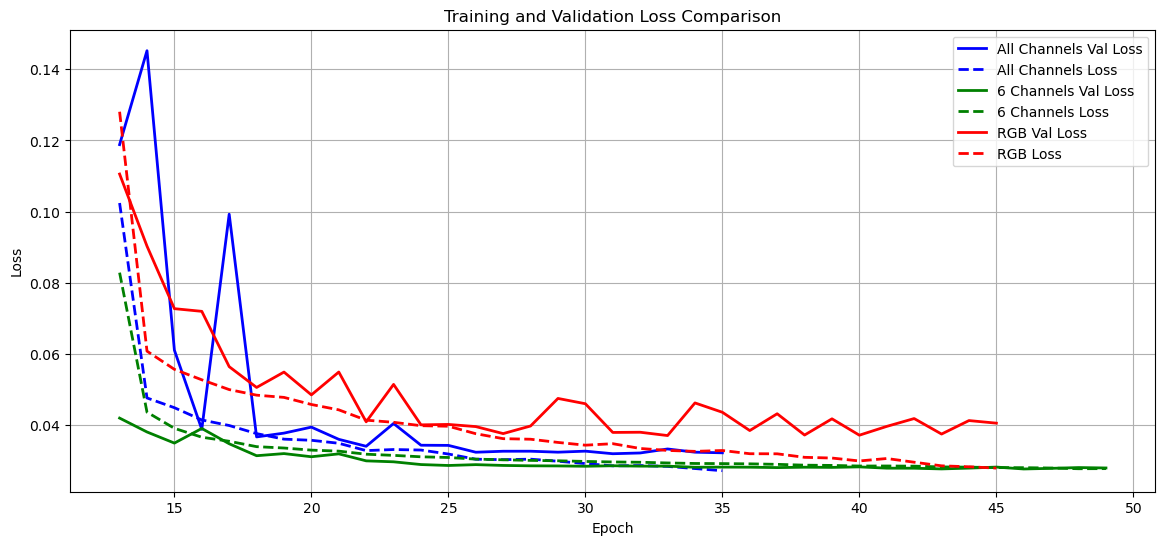

In [75]:
def plot_df(df1, df2, df3):
    # Increase index by 1
    for df in [df1, df2, df3]:
        df.index = df.index + 1
    
    # Define colors for each dataset
    colors = ['b', 'g', 'r']  # Blue, Green, Red
    labels = ['All Channels', '6 Channels', 'RGB']
    
    # Plot
    plt.figure(figsize=(14, 6))
    
    for i, df in enumerate([df1, df2, df3]):
        plt.plot(df.index, df['val_loss'], color=colors[i], linestyle='-', label=f'{labels[i]} Val Loss', linewidth =2)
        plt.plot(df.index, df['loss'], color=colors[i], linestyle='--', label=f'{labels[i]} Loss', linewidth =2)
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Comparison')
    plt.legend()
    plt.grid(True)
    plt.savefig("plots.png")
    plt.show()
    

plot_df(df_10Chan, df_6Chan, df_RGB)

In [34]:

os.listdir("/Users/frankconway/Downloads/drive-download-20250326T170804Z-001")

['inceptionv3_img_augRGB_1e-05_dice_loss.csv',
 'inceptionv3_augRGB_1e-05_binary_crossentropy.csv',
 'resnet506Chan_1e-05_dice_loss.csv',
 'inceptionv3_img6Chan_0.001_binary_crossentropy.csv',
 'resnet50_img_augRGB_1e-05_dice_loss.csv',
 'inceptionv3_augRGB_1e-05_dice_loss.csv',
 'resnet50_img_augRGB_1e-05_binary_crossentropy.csv',
 'inceptionv3_img10Chan_1e-05_dice_loss.csv',
 'inceptionv310Chan_0.001_dice_loss.csv',
 'resnet50_img10Chan_0.001_dice_loss.csv',
 'resnet50_imgRGB_0.0001_binary_crossentropy.csv',
 'inceptionv3_imgRGB_0.0001_binary_crossentropy.csv',
 'inceptionv3_aug10Chan_0.0001_binary_crossentropy.csv',
 'resnet50RGB_0.001_binary_crossentropy.csv',
 'resnet50_img_aug10Chan_0.001_binary_crossentropy.csv',
 'inceptionv3_imgRGB_0.001_binary_crossentropy.csv',
 'resnet50_img10Chan_0.001_binary_crossentropy.csv',
 'inceptionv3_aug10Chan_0.0001_dice_loss.csv',
 'inceptionv36Chan_1e-05_dice_loss.csv',
 'base_unetRGB_0.001_dice_loss.csv',
 'inceptionv3_img_augRGB_0.001_binary_c

In [24]:
test = 'inceptionv3_img10Chan_1e-05_dice_loss.csv'

test = test.replace("3","")
test

'inceptionv_img10Chan_1e-05_dice_loss.csv'